<a href="https://colab.research.google.com/github/aditisadhu/hotel-booking-eda/blob/main/Hotel_booking_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/mojtaba142/hotel-booking

Context: The City and Resort hotel are seeing high cancellation rates which is leading to lesser revenue and hotel room use.Can you help to increase revenue by mitigation of the lower cancellation rates in both hotels and also suggest some business advice to address this problem.

State the analytical problem statement, Factors & Hypothesis for testing, Explore & Clean data, derive useful insights,list down your assumptions. Also, is there any other prescriptive solution you can also suggest to business?

###Problem Statement:

To identify the reasons behind the high cancellation rate at The City and Resort hotels to decide plan of action to reduce it in  next 2 months.


###Factors & Hypothesis:

The following factors can be the causes of increase in cancellation rates:
1. Decrease in rating/reviews on booking sites
2. Change in management, leading to poorer guest service (will be reflected in the reviews)
3. Increase in room tariff
4. Newly developed + better priced nearby hotels
5. Sudden change in weather or bad weather predictions, affecting travelling convenience
6. Change in some hotel policies which are not customer-friendly (For eg- earlier 2 adults + 2 kids were allowed in a room but now only 3 persons max are allowed, or now breakfast is not complimentary).
7. Insufficient promotions during certain period
8. **Customers have low preference for the hotels during certain time of the year due to the season**
9. **Customers have low preference for certain days of the week**



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Preplaced/hotel_booking.csv')

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Cleaning

In [ ]:
# drop duplicates
df=df.drop_duplicates()

In [ ]:
# Variables that dont add value
df=df.drop(columns=['name', 'email', 'phone-number', 'credit_card'])

In [ ]:
# Outliers
df.drop( df[(df['children']==10) | (df['babies']>=9)].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7963b2ca4f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7963b2ca55d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7963b2ca4130>],
 'medians': [<matplotlib.lines.Line2D at 0x7963b2e8d960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7963b2e8e230>],
 'means': []}

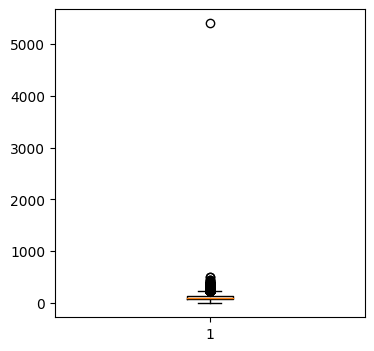

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot(df['adr'])

In [ ]:
df.drop(df[ (df['adr']>1000) | (df['adr']<0) ].index, inplace=True)

# EDA

([<matplotlib.patches.Wedge at 0x79671c48eef0>,
 [Text(-0.4355420495755465, 1.0101005509609093, 'Not cancelled'),
  Text(0.4355420495755469, -1.0101005509609091, 'Cancelled')],
 [Text(-0.2375683906775708, 0.5509639368877687, '63.0%'),
  Text(0.237568390677571, -0.5509639368877685, '37.0%')])

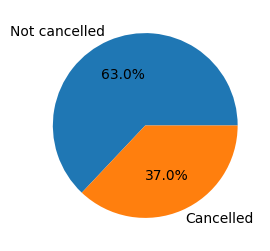

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(df['is_canceled'].value_counts(), labels=['Not cancelled', 'Cancelled'], autopct="%0.1f%%")

In [ ]:
corr_matrix=df.corr()['is_canceled']
corr_matrix.loc[abs(corr_matrix)>0.05]

<ipython-input-14-36c72983c412>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()['is_canceled']


is_canceled                       1.000000
lead_time                         0.293123
adults                            0.060017
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
days_in_waiting_list              0.054186
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

**Numerical variables to be analysed**

*Priority 1 set:*

Positive relationship:lead_time, previous_cancellations

Negative relationship: booking_changes, total_of_special_requests, required_car_parking_spaces

*Priority 2 set:*

Positive relationship: days_in_waiting_list, adults

Negative relationship: agent, is_repeated_guest, previous_bookings_not_canceled

Text(0, 0.5, 'Percentage')

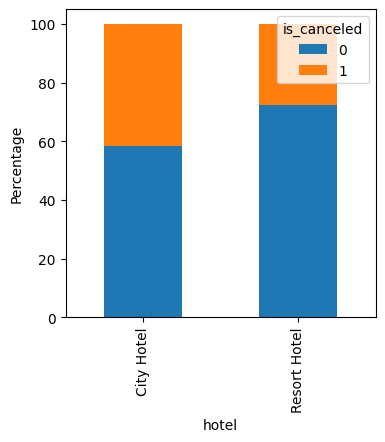

In [ ]:
df_hotel=df.groupby(['hotel','is_canceled']).size() / df.groupby(['hotel']).size() *100
df_hotel.unstack().plot.bar(stacked=True, figsize=(4,4))
plt.ylabel("Percentage")
# inference: city has much higher cancellation rate

Text(0, 0.5, 'Average waiting time')

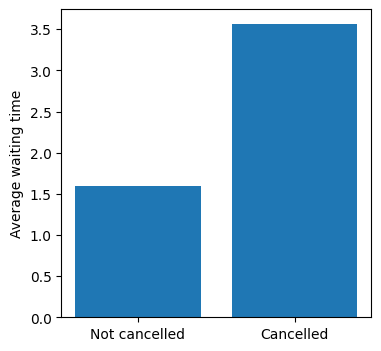

In [ ]:
x=[df[ df['is_canceled']==0 ]['days_in_waiting_list'].mean(), df[ df['is_canceled']==1 ]['days_in_waiting_list'].mean()]
y=["Not cancelled","Cancelled"]
plt.figure(figsize=(4,4))
plt.bar(y,x)
plt.ylabel('Average waiting time')
# inference: waiting time should be reduced

<Axes: xlabel='hotel', ylabel='days_in_waiting_list'>

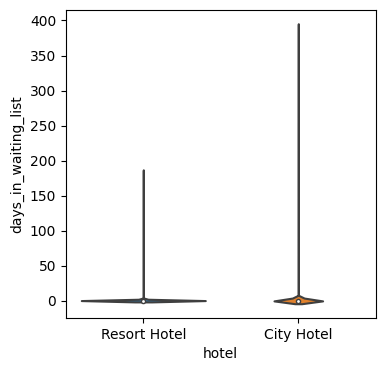

In [ ]:
plt.figure(figsize=(4,4))
sns.violinplot(data=df, x='hotel', y='days_in_waiting_list', jitter=False)
# inference, action: City Hotel keeps higher waiting time, should aim to reduce

In [ ]:
df_0 = df[ (df['is_canceled']==0)]
df_1 = df[ (df['is_canceled']==1)]

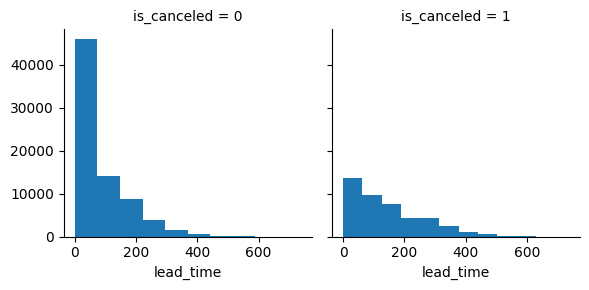

In [ ]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time')
# inference: lower lead time means less cancellation

Text(0, 0.5, 'Percentage(%)')

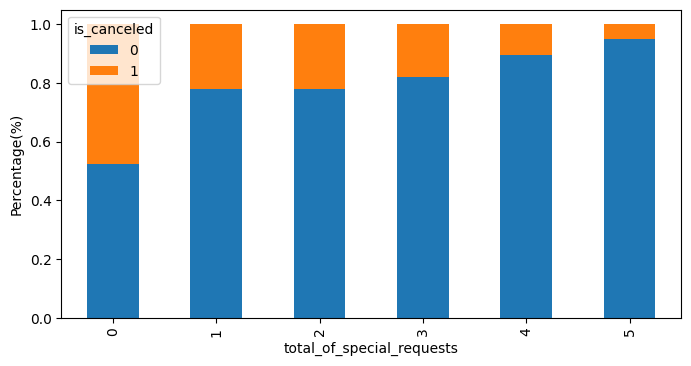

In [ ]:
pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,4))
plt.ylabel('Percentage(%)')
# inference: confirmation of the requests plays important in non-cancellations

<Axes: xlabel='deposit_type', ylabel='count'>

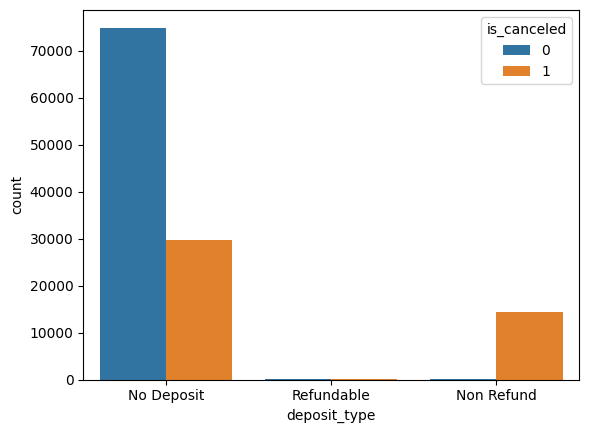

In [ ]:
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
#inference: No prior deposit is best non-refundable ones are worst

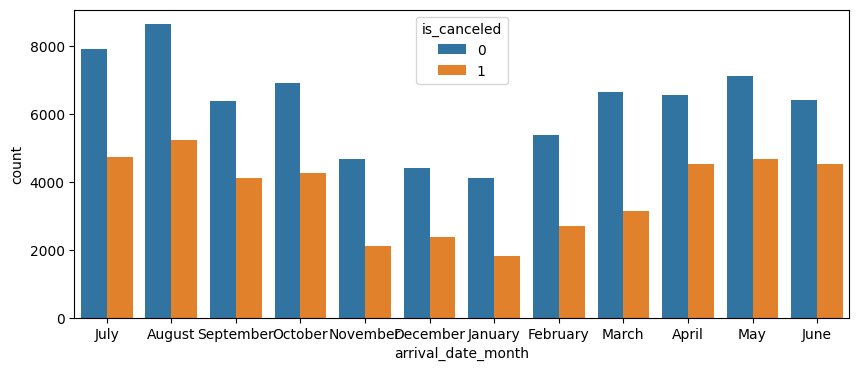

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
chart = sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', ax=ax)
#inference: Less bookings mid year

In [ ]:
comp_repeat = pd.crosstab(df['company'], df['is_repeated_guest'])
comp_repeat['repeat guest ratio'] = comp_repeat[1]/ (comp_repeat[0]+comp_repeat[1])
comp_repeat[ (comp_repeat[0]>0) & (comp_repeat[1]>20) ].sort_values('repeat guest ratio', ascending=False)
# inference: some compnies have higher repeat rate

is_repeated_guest,0,1,repeat guest ratio
company,,,
219.0,39,102,0.723404
270.0,13,30,0.697674
91.0,17,31,0.645833
40.0,337,590,0.636462
45.0,96,154,0.616000
331.0,32,29,0.475410
154.0,74,59,0.443609
47.0,50,22,0.305556
153.0,154,61,0.283721


In [8]:
company_df = df.groupby(['company']).size()
low_perf_companies_ratio = len(company_df[ company_df< 20].unique())/ len(df['company'].unique())
print("Companies that hardly contribute in the revenue of the hotels:", low_perf_companies_ratio*100, "%")
# inference: 5% companies hardly contribute in the revenue of the hotels

Companies that hardly contribute in the revenue of the hotels: 5.382436260623229 %


Text(0, 0.5, 'Percentage who previously cancelled(%)')

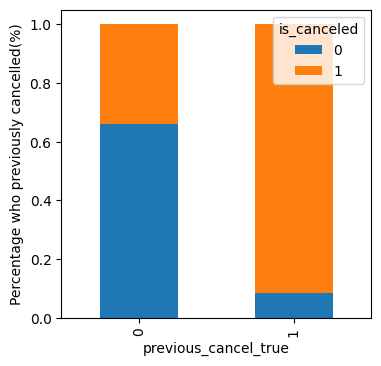

In [ ]:
df['previous_cancel_true'] = [1 if i>0 else 0 for i in df['previous_cancellations']]
previous_plot = pd.crosstab(df['previous_cancel_true'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(4,4))
plt.ylabel('Percentage who previously cancelled(%)')
# inference: lower the previous cancellation, lower the cancellations#

<Axes: xlabel='arrival_date_year', ylabel='count'>

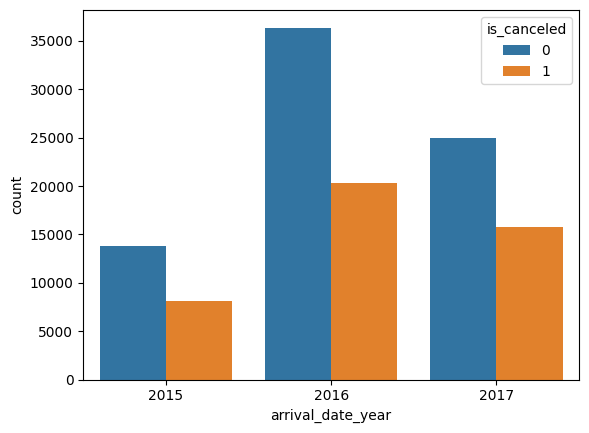

In [ ]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

In [7]:
print("Average children for not-cancelled cases:", df[ df['is_canceled']==0 ]['children'].mean(),
      "\nAverage children for cancelled cases:",df[ df['is_canceled']==1 ]['children'].mean() )
# inference: hotels are sufficiently children friendly

Average children for not-cancelled cases: 0.10234680573663625 
Average children for cancelled cases: 0.10651289009497965


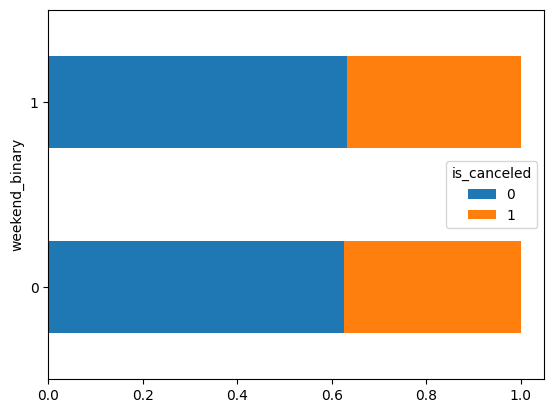

In [14]:
df['weekend_binary'] = [1 if x>0 else 0 for x in df['stays_in_weekend_nights']]
df_weekend=pd.crosstab(df['weekend_binary'], df['is_canceled'], normalize='index')
ax=df_weekend.plot.barh(stacked=True)
# inference:

# Actionable insights for reducing cancellations
1. The hotels should offer discounts during the off season, i.e. from November to March
2. Encourage no prior deposit for paymment, and discourage non-refundable deposits
3. Increase quota for the companies having higher repeat rate. Introduce some kind of membership for repeated guests
4. Reduce waiting time, especially for City Hotel
5. No need to invest in companies which bring very few customers. Instead the hotels can promote more on other websites which attract more customers